In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from enum import Enum
import itertools
from datetime import datetime

dataset_dir = "../DataSet_CSVs/"

# shared CSV Link: https://docs.google.com/spreadsheets/d/1R4jSAZRnY51854B2PE-Y8L8G4KaLXcE4yR4zDtp-1Tg/edit?usp=sharing

In [2]:
# Import the dataset
bike_df = pd.read_csv(dataset_dir + "202112-capitalbikeshare-tripdata.csv")
bike_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,D23C21951F265D19,classic_bike,2021-12-12 14:25:41,2021-12-12 14:31:04,Monroe St & Monroe Pl,32017.0,Fleet St & Ritchie Pkwy,32032.0,39.083673,-77.149162,39.076331,-77.141378,member
1,4E2218DC5EF71C81,electric_bike,2021-12-30 16:27:27,2021-12-30 17:02:16,5th & Kennedy St NW,31403.0,6th & K St NE,31645.0,38.956651,-77.019741,38.902932,-76.998405,casual
2,A19607CDC98C051C,classic_bike,2021-12-27 11:14:18,2021-12-27 11:38:00,Monroe St & Monroe Pl,32017.0,Congressional Ln & E Jefferson St,32081.0,39.083673,-77.149162,39.062190,-77.129235,casual
3,8B9BB60DB257BA57,classic_bike,2021-12-27 11:12:54,2021-12-27 11:37:49,Monroe St & Monroe Pl,32017.0,Congressional Ln & E Jefferson St,32081.0,39.083673,-77.149162,39.062190,-77.129235,casual
4,4EAB499C31027AB4,classic_bike,2021-12-17 09:06:54,2021-12-17 09:26:05,5th & Kennedy St NW,31403.0,John McCormack Rd NE,31528.0,38.956556,-77.019814,38.938889,-76.997226,casual


In [3]:
# Get all the column headers out of the datasheet to a csv
category_list = ["rideable_type", "start_station_name", "end_station_name", "member_casual"]
col_info_list = [[str(col_new), str(bike_df[col_new].dtype), str(bike_df[col_new].isna().sum()), str(len(bike_df[col_new].unique())), str(len(bike_df[col_new].unique()) == len(bike_df[col_new]))] for col_new in bike_df.columns]
with open(dataset_dir + "columns.csv", "w") as colfile:
    [colfile.write(",".join([col, col_dtype, count_sum, count_unique])+"\n") for col, col_dtype, count_sum, count_unique, count_is_unique in col_info_list]

In [4]:
# Print out the head of the dataset
bike_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,D23C21951F265D19,classic_bike,2021-12-12 14:25:41,2021-12-12 14:31:04,Monroe St & Monroe Pl,32017.0,Fleet St & Ritchie Pkwy,32032.0,39.083673,-77.149162,39.076331,-77.141378,member
1,4E2218DC5EF71C81,electric_bike,2021-12-30 16:27:27,2021-12-30 17:02:16,5th & Kennedy St NW,31403.0,6th & K St NE,31645.0,38.956651,-77.019741,38.902932,-76.998405,casual
2,A19607CDC98C051C,classic_bike,2021-12-27 11:14:18,2021-12-27 11:38:00,Monroe St & Monroe Pl,32017.0,Congressional Ln & E Jefferson St,32081.0,39.083673,-77.149162,39.062190,-77.129235,casual
3,8B9BB60DB257BA57,classic_bike,2021-12-27 11:12:54,2021-12-27 11:37:49,Monroe St & Monroe Pl,32017.0,Congressional Ln & E Jefferson St,32081.0,39.083673,-77.149162,39.062190,-77.129235,casual
4,4EAB499C31027AB4,classic_bike,2021-12-17 09:06:54,2021-12-17 09:26:05,5th & Kennedy St NW,31403.0,John McCormack Rd NE,31528.0,38.956556,-77.019814,38.938889,-76.997226,casual


In [5]:
# Print out the dataset information
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190847 entries, 0 to 190846
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             190847 non-null  object 
 1   rideable_type       190847 non-null  object 
 2   started_at          190847 non-null  object 
 3   ended_at            190847 non-null  object 
 4   start_station_name  180747 non-null  object 
 5   start_station_id    180747 non-null  float64
 6   end_station_name    179344 non-null  object 
 7   end_station_id      179344 non-null  float64
 8   start_lat           190847 non-null  float64
 9   start_lng           190847 non-null  float64
 10  end_lat             190586 non-null  float64
 11  end_lng             190586 non-null  float64
 12  member_casual       190847 non-null  object 
dtypes: float64(6), object(7)
memory usage: 18.9+ MB


In [6]:
# Describe the df
bike_df.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,180747.000000,179344.000000,190847.000000,190847.000000,190586.000000,190586.000000
mean,31367.365196,31367.679928,38.904063,-77.030403,38.903029,-77.030211
std,247.959906,246.213269,0.024920,0.031298,0.024511,0.030980
min,31000.000000,31000.000000,38.780000,-77.368416,38.780000,-77.368416
25%,31212.000000,31214.000000,38.892453,-77.043600,38.892275,-77.043680
50%,31278.000000,31276.000000,38.903658,-77.030000,38.902674,-77.030000
75%,31607.000000,31608.000000,38.915000,-77.012365,38.912648,-77.012365
max,32609.000000,32901.000000,39.125887,-76.825535,39.125828,-76.825535


In [7]:
# Drop out the Ride ID
bike_df.drop(["ride_id", "start_station_id", "end_station_id"], axis=1, inplace=True)

In [8]:
# Copy off the original df for any future use with the Null values.
copy_bike_df = bike_df.copy()

In [9]:
# Drop the null columns for initial analyses
bike_df.dropna(axis=0, inplace=True)

In [10]:
# Verify the new structure of the data.
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174372 entries, 0 to 190846
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   rideable_type       174372 non-null  object 
 1   started_at          174372 non-null  object 
 2   ended_at            174372 non-null  object 
 3   start_station_name  174372 non-null  object 
 4   end_station_name    174372 non-null  object 
 5   start_lat           174372 non-null  float64
 6   start_lng           174372 non-null  float64
 7   end_lat             174372 non-null  float64
 8   end_lng             174372 non-null  float64
 9   member_casual       174372 non-null  object 
dtypes: float64(4), object(6)
memory usage: 14.6+ MB


In [11]:
# The elapsed time on the bike
bike_df["started_at"] = pd.to_datetime(bike_df["started_at"])
bike_df["ended_at"] = pd.to_datetime(bike_df["ended_at"])
bike_df["elapsed_time"] = [((end) - (start)) for start, end in list(zip(bike_df["started_at"], bike_df["ended_at"]))]

In [12]:
# Parse out the date time stamps into separate columns
class dateenum(str, Enum):
    year="year"
    month="month"
    week="week"
    day="day"
    hour="hour"
    day_of_week="dow"
    
# Storage lists to parse out to columns

# Function to archive all the information out of the column
def datetime_lambda_func(input_dt, datetime_col_list):
    datetime_col_list[dateenum.year].append(input_dt.year)
    datetime_col_list[dateenum.month].append(input_dt.month)
    datetime_col_list[dateenum.day].append(input_dt.day)
    datetime_col_list[dateenum.hour].append(input_dt.hour)
    datetime_col_list[dateenum.day_of_week].append(input_dt.day%7)
    datetime_col_list[dateenum.week].append(input_dt.day//7)
    return datetime(input_dt.year, input_dt.month, input_dt.day, input_dt.hour)

# Find the columns with the times
time_list = ["started_at", "ended_at"]

for col in time_list:
    datetime_col_list = {dateenum.year:[], dateenum.month:[], dateenum.week:[], dateenum.day:[], dateenum.hour:[], dateenum.day_of_week:[]}
    bike_df[col] = bike_df[col].apply(lambda l: datetime_lambda_func(l, datetime_col_list))
    for value in [dateenum.year, dateenum.month, dateenum.day, dateenum.hour, dateenum.day_of_week, dateenum.week]:
        bike_df[f"{col}_{value}"] = datetime_col_list[value]
        category_list.append(f"{col}_{value}")
bike_df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,...,started_at_day,started_at_hour,started_at_dow,started_at_week,ended_at_year,ended_at_month,ended_at_day,ended_at_hour,ended_at_dow,ended_at_week
0,classic_bike,2021-12-12 14:00:00,2021-12-12 14:00:00,Monroe St & Monroe Pl,Fleet St & Ritchie Pkwy,39.083673,-77.149162,39.076331,-77.141378,member,...,12,14,5,1,2021,12,12,14,5,1
1,electric_bike,2021-12-30 16:00:00,2021-12-30 17:00:00,5th & Kennedy St NW,6th & K St NE,38.956651,-77.019741,38.902932,-76.998405,casual,...,30,16,2,4,2021,12,30,17,2,4
2,classic_bike,2021-12-27 11:00:00,2021-12-27 11:00:00,Monroe St & Monroe Pl,Congressional Ln & E Jefferson St,39.083673,-77.149162,39.062190,-77.129235,casual,...,27,11,6,3,2021,12,27,11,6,3
3,classic_bike,2021-12-27 11:00:00,2021-12-27 11:00:00,Monroe St & Monroe Pl,Congressional Ln & E Jefferson St,39.083673,-77.149162,39.062190,-77.129235,casual,...,27,11,6,3,2021,12,27,11,6,3
4,classic_bike,2021-12-17 09:00:00,2021-12-17 09:00:00,5th & Kennedy St NW,John McCormack Rd NE,38.956556,-77.019814,38.938889,-76.997226,casual,...,17,9,3,2,2021,12,17,9,3,2


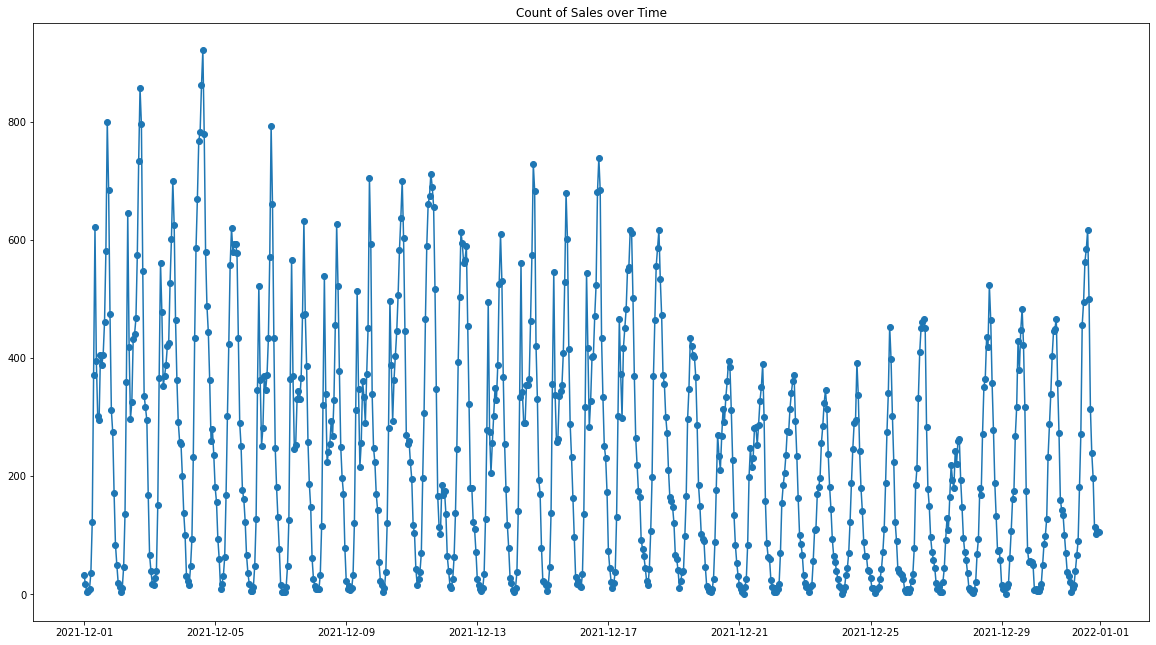

In [13]:
# Plot out the data by datetime
time_bike_df = bike_df.groupby(["started_at"]).size()
plt.figure(figsize=(20, 11))
plt.plot_date(time_bike_df.index, time_bike_df.values, linestyle="solid")
plt.title("Count of Sales over Time")
plt.show()

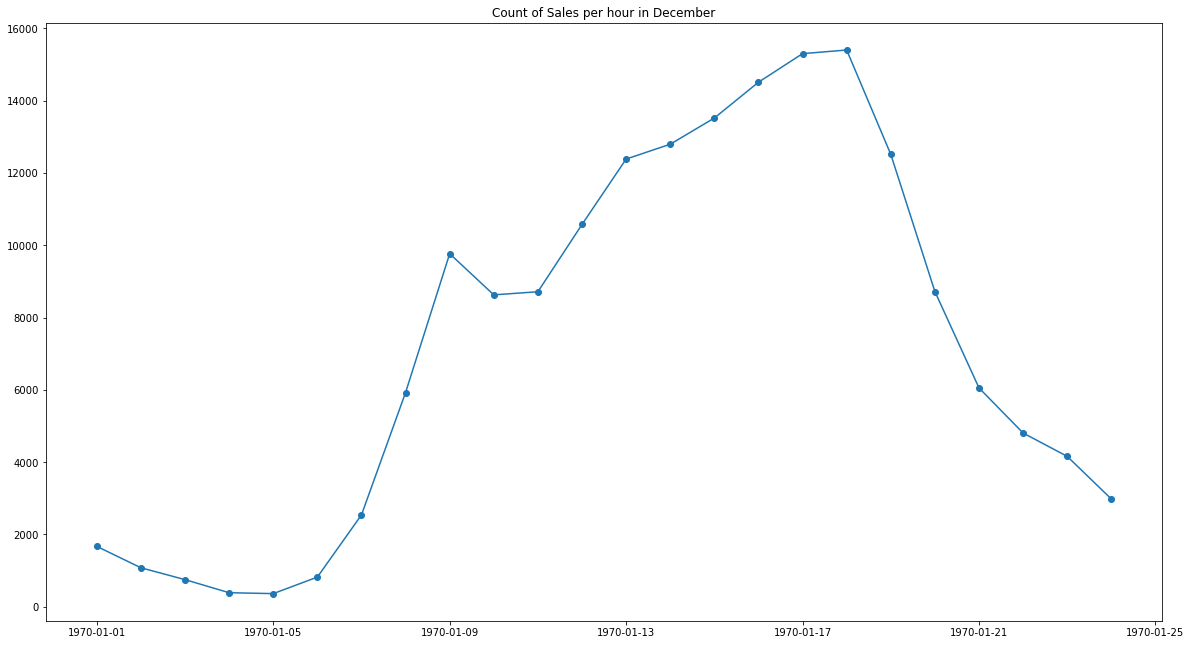

In [14]:
# Plot the distributions over a single day.
hour_bike_df = bike_df.groupby(["started_at_hour"]).size()
plt.figure(figsize=(20, 11))
plt.plot_date(hour_bike_df.index, hour_bike_df.values, linestyle="solid")
plt.title("Count of Sales per hour in December")
plt.show()

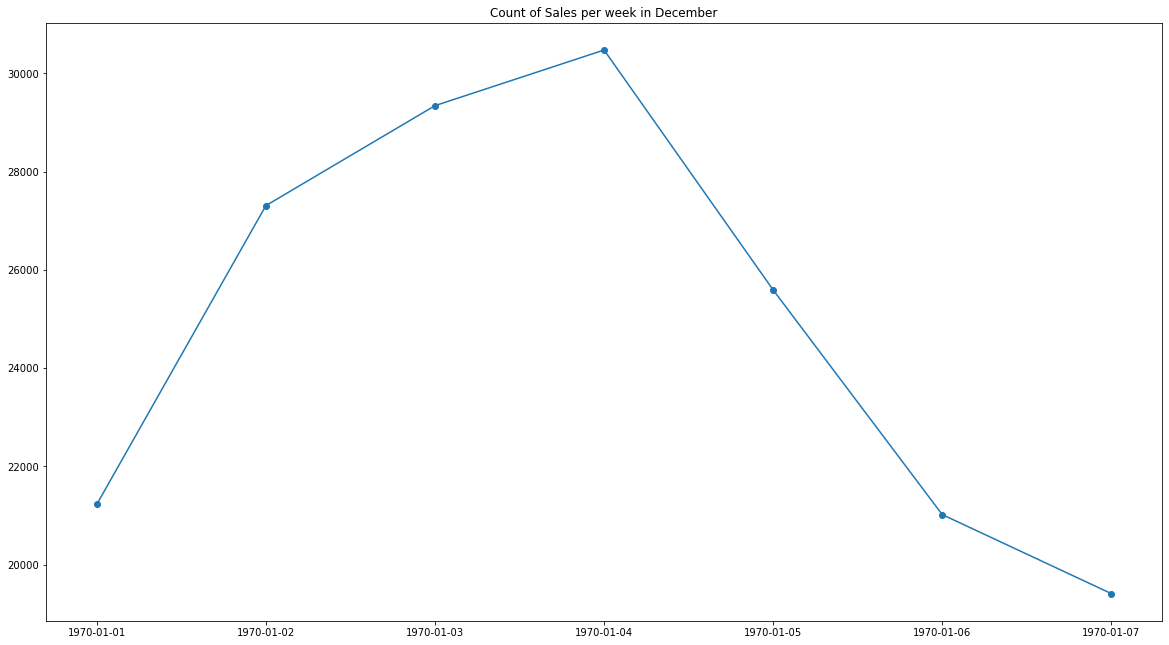

In [15]:
# Plot the distributions over a single day.
hour_bike_df = bike_df.groupby(["started_at_dow"]).size()
plt.figure(figsize=(20, 11))
plt.plot_date(hour_bike_df.index, hour_bike_df.values, linestyle="solid")
plt.title("Count of Sales per week in December")
plt.show()

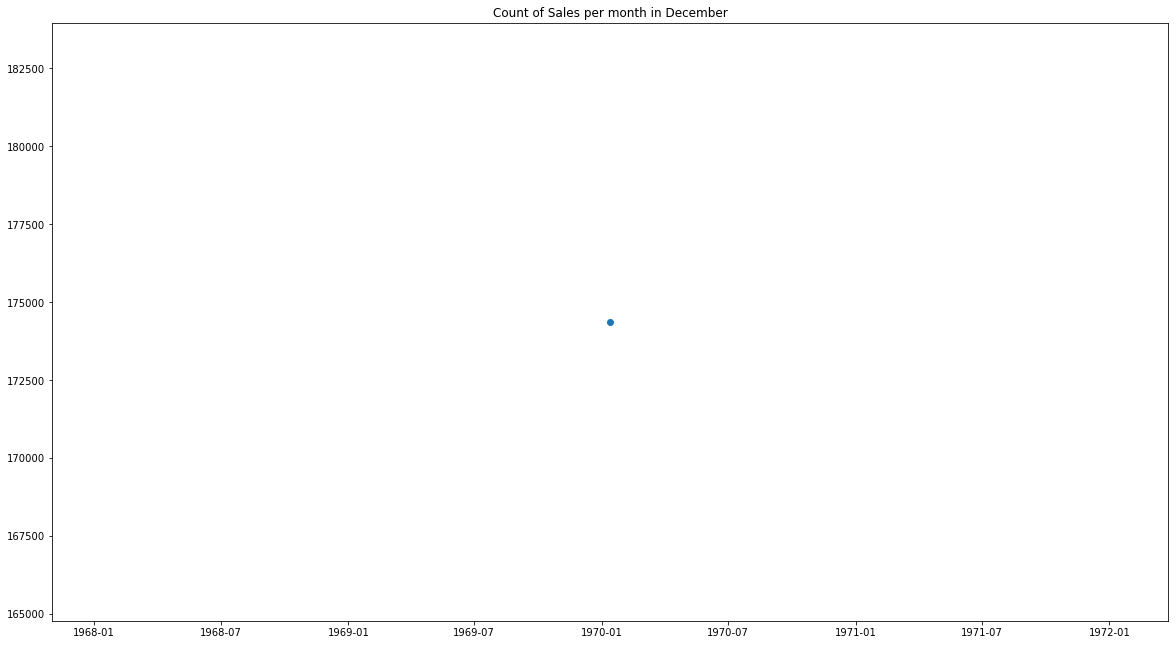

In [16]:
# Plot the distributions over a single day.
hour_bike_df = bike_df.groupby(["started_at_month"]).size()
plt.figure(figsize=(20, 11))
plt.plot_date(hour_bike_df.index, hour_bike_df.values, linestyle="solid")
plt.title("Count of Sales per month in December")
plt.show()

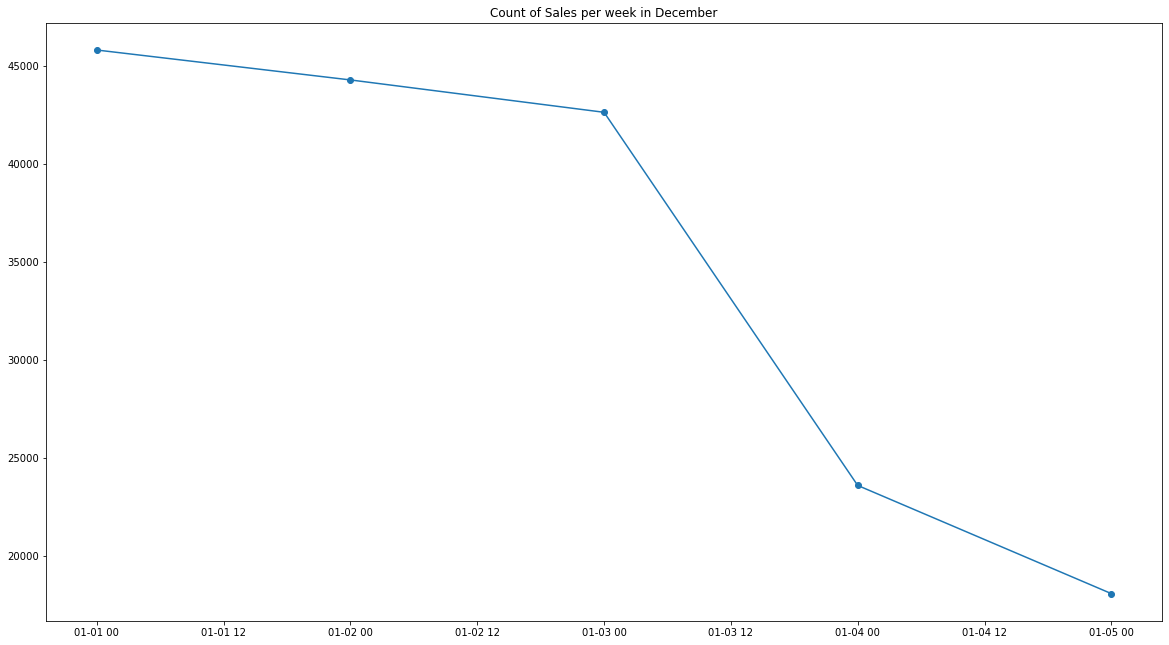

In [17]:
# Plot the distributions over a single day.
hour_bike_df = bike_df.groupby(["started_at_week"]).size()
plt.figure(figsize=(20, 11))
plt.plot_date(hour_bike_df.index, hour_bike_df.values, linestyle="solid")
plt.title("Count of Sales per week in December")
plt.show()

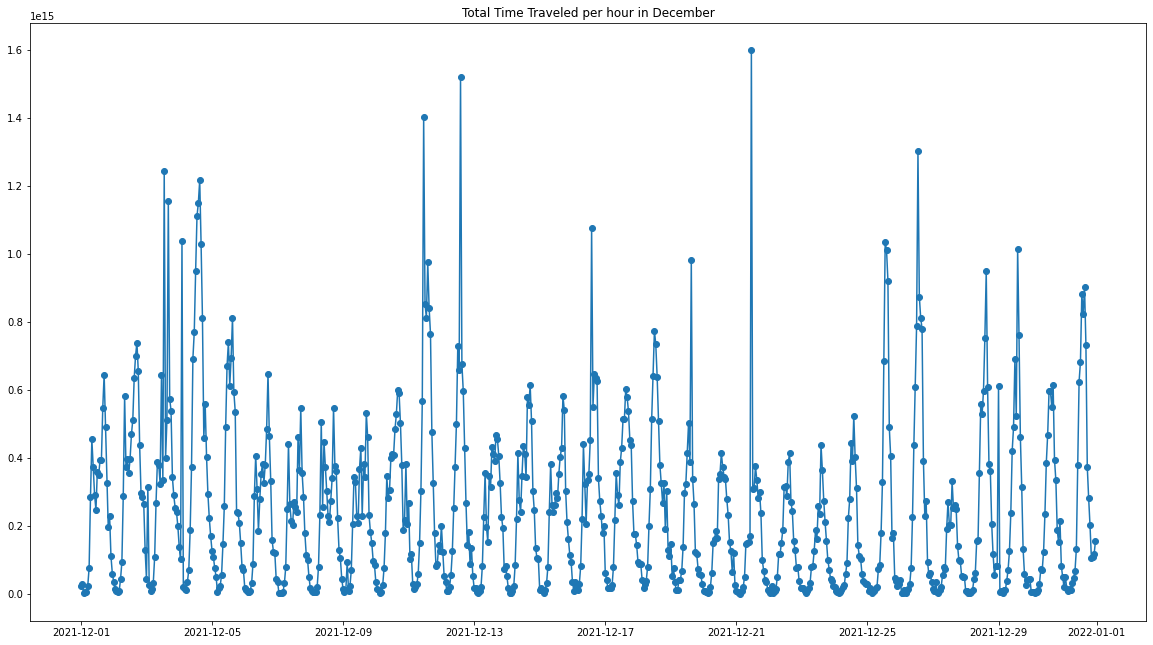

In [18]:
# Plot out the elapsed time per timem increment
hour_bike_df = bike_df.groupby(["started_at"])["elapsed_time"].sum()
plt.figure(figsize=(20, 11))
plt.plot_date(hour_bike_df.index, hour_bike_df.values, linestyle="solid")
plt.title("Total Time Traveled per hour in December")
plt.show()

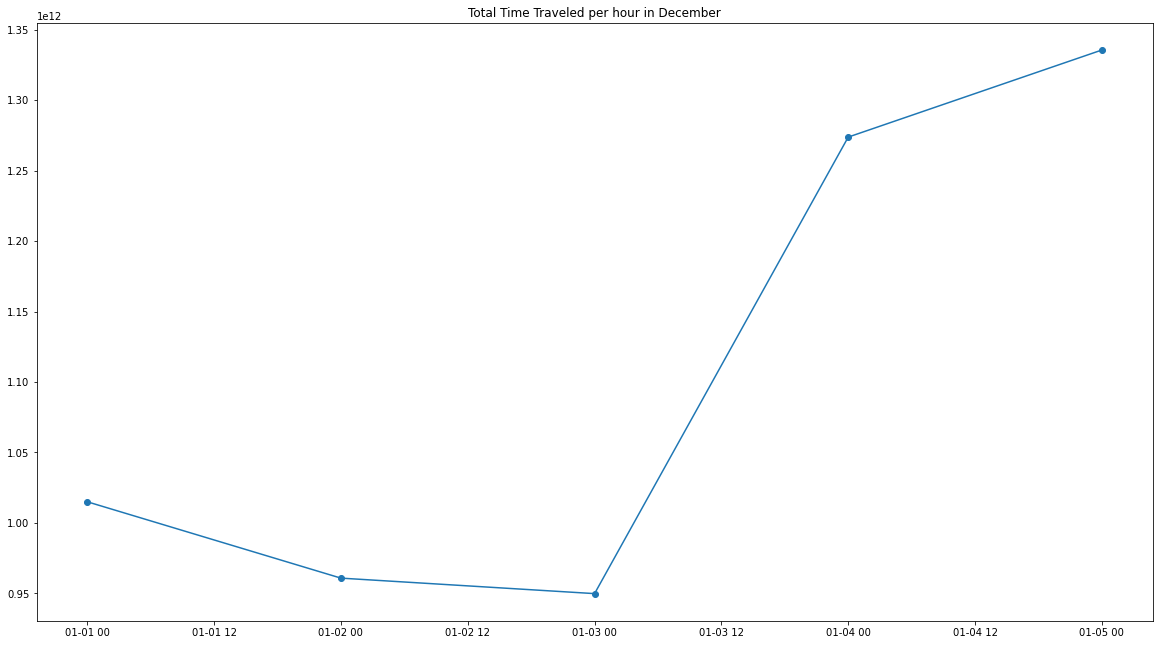

In [19]:
# Plot out the elapsed time per timem increment
hour_bike_df = bike_df.groupby(["started_at_week"])["elapsed_time"].mean()
plt.figure(figsize=(20, 11))
plt.plot_date(hour_bike_df.index, hour_bike_df.values, linestyle="solid")
plt.title("Total Time Traveled per hour in December")
plt.show()

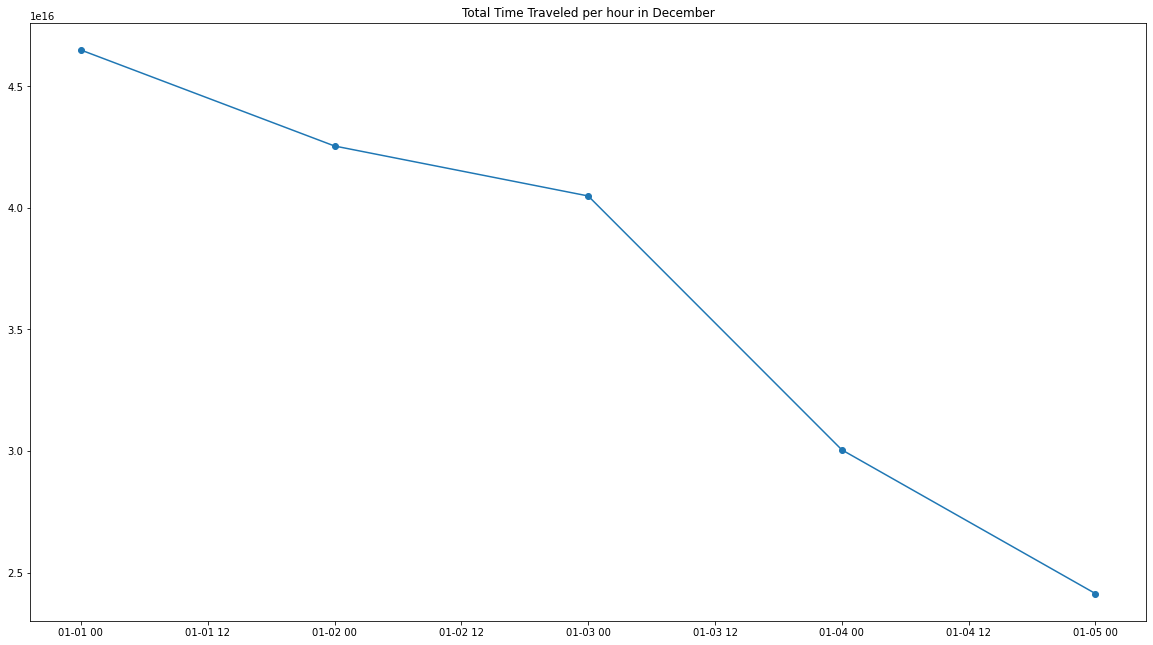

In [20]:
# Plot out the elapsed time per timem increment
hour_bike_df = bike_df.groupby(["started_at_week"])["elapsed_time"].sum()
plt.figure(figsize=(20, 11))
plt.plot_date(hour_bike_df.index, hour_bike_df.values, linestyle="solid")
plt.title("Total Time Traveled per hour in December")
plt.show()

In [21]:
bike_df.drop(["started_at", "ended_at"], axis=1, inplace=True)

In [22]:
# Bin off the latitude and longitude
location_list = ["start_lat", "start_lng", "end_lat", "end_lng"]
for perm in itertools.product([2, 5, 10],location_list):
        bike_df[f"{perm[1]}_{perm[0]}"] = bike_df[perm[1]].apply(lambda l: l - (l%perm[0]))
bike_df.drop(location_list, axis=1, inplace=True)
bike_df.head()

,rideable_type,start_station_name,end_station_name,member_casual,elapsed_time,started_at_year,started_at_month,started_at_day,started_at_hour,started_at_dow,...,end_lat_2,end_lng_2,start_lat_5,start_lng_5,end_lat_5,end_lng_5,start_lat_10,start_lng_10,end_lat_10,end_lng_10
0,classic_bike,Monroe St & Monroe Pl,Fleet St & Ritchie Pkwy,member,0 days 00:05:23,2021,12,12,14,5,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
1,electric_bike,5th & Kennedy St NW,6th & K St NE,casual,0 days 00:34:49,2021,12,30,16,2,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
2,classic_bike,Monroe St & Monroe Pl,Congressional Ln & E Jefferson St,casual,0 days 00:23:42,2021,12,27,11,6,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
3,classic_bike,Monroe St & Monroe Pl,Congressional Ln & E Jefferson St,casual,0 days 00:24:55,2021,12,27,11,6,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
4,classic_bike,5th & Kennedy St NW,John McCormack Rd NE,casual,0 days 00:19:11,2021,12,17,9,3,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0


In [23]:
# Convert the objects to categorical types
bike_df[category_list] = bike_df[category_list].astype("category")
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174372 entries, 0 to 190846
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   rideable_type       174372 non-null  category       
 1   start_station_name  174372 non-null  category       
 2   end_station_name    174372 non-null  category       
 3   member_casual       174372 non-null  category       
 4   elapsed_time        174372 non-null  timedelta64[ns]
 5   started_at_year     174372 non-null  category       
 6   started_at_month    174372 non-null  category       
 7   started_at_day      174372 non-null  category       
 8   started_at_hour     174372 non-null  category       
 9   started_at_dow      174372 non-null  category       
 10  started_at_week     174372 non-null  category       
 11  ended_at_year       174372 non-null  category       
 12  ended_at_month      174372 non-null  category       
 13  ended_at_day  

In [24]:
# Get the one hot encoded dummy parameters
bike_df = pd.get_dummies(data=bike_df, columns=category_list, drop_first=True)
bike_df.head()

,elapsed_time,start_lat_2,start_lng_2,end_lat_2,end_lng_2,start_lat_5,start_lng_5,end_lat_5,end_lng_5,start_lat_10,...,ended_at_dow_1,ended_at_dow_2,ended_at_dow_3,ended_at_dow_4,ended_at_dow_5,ended_at_dow_6,ended_at_week_1,ended_at_week_2,ended_at_week_3,ended_at_week_4
0,0 days 00:05:23,38.0,-78.0,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,...,0,0,0,0,1,0,1,0,0,0
1,0 days 00:34:49,38.0,-78.0,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,...,0,1,0,0,0,0,0,0,0,1
2,0 days 00:23:42,38.0,-78.0,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,...,0,0,0,0,0,1,0,0,1,0
3,0 days 00:24:55,38.0,-78.0,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,...,0,0,0,0,0,1,0,0,1,0
4,0 days 00:19:11,38.0,-78.0,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,...,0,0,1,0,0,0,0,1,0,0


In [25]:
# break out the elapsed time
bike_df["elapsed_time"] = bike_df["elapsed_time"].apply(lambda l: l.seconds/60)
bike_df.head()

,elapsed_time,start_lat_2,start_lng_2,end_lat_2,end_lng_2,start_lat_5,start_lng_5,end_lat_5,end_lng_5,start_lat_10,...,ended_at_dow_1,ended_at_dow_2,ended_at_dow_3,ended_at_dow_4,ended_at_dow_5,ended_at_dow_6,ended_at_week_1,ended_at_week_2,ended_at_week_3,ended_at_week_4
0,5.383333,38.0,-78.0,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,...,0,0,0,0,1,0,1,0,0,0
1,34.816667,38.0,-78.0,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,...,0,1,0,0,0,0,0,0,0,1
2,23.700000,38.0,-78.0,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,...,0,0,0,0,0,1,0,0,1,0
3,24.916667,38.0,-78.0,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,...,0,0,0,0,0,1,0,0,1,0
4,19.183333,38.0,-78.0,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,...,0,0,1,0,0,0,0,1,0,0
